### Install the required packages



In [ ]:
!pip install  tflite-model-maker
!pip install  pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.3/577.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 

In [ ]:
import numpy as np
import os
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector
import tensorflow as tf
#assert tf.__version__.startswith('2'

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.10.0 and strictly below 2.13.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're usin

RuntimeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 2. Load the dataset.**




In [ ]:
#save final weights to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Paths pointing to training and validation data respectively. Images and xml annotations are in the same location
tr_image_dir= '/content/drive/MyDrive/edix/train'
tr_image_annotations= '/content/drive/MyDrive/edix/train'
val_image_dir='/content/drive/MyDrive/edix/valid'
test_image_dir= '/content/drive/MyDrive/edix/test'

label_map={1:'bottle', 2:'plastic',3:'bag',4:'paper'}
print(label_map)

# Load data. Data is loaded as tfrecord and stored in the cache_dir location, for fast future use. 
train_ds = object_detector.DataLoader.from_pascal_voc(images_dir=tr_image_dir,
                                                      annotations_dir= tr_image_dir,
                                                      label_map=label_map
                                                     )
# Load validation subset.
val_ds = object_detector.DataLoader.from_pascal_voc(images_dir=val_image_dir,
                                                      annotations_dir= val_image_dir,
                                                      label_map=label_map,
                                                     )
# Load validation subset.
test_ds = object_detector.DataLoader.from_pascal_voc(images_dir=test_image_dir,
                                                      annotations_dir= test_image_dir,
                                                      label_map=label_map,
                                                     )

print("Train dataset contains {} images".format(train_ds.__len__()))

{1: 'bottle', 2: 'plastic', 3: 'bag', 4: 'paper'}
Train dataset contains 354 images


In [ ]:
spec = model_spec.get('efficientdet_lite0')

**Step 3. Train the TensorFlow model with the training data.**

* The EfficientDet-Lite0 model uses `epochs = 50` by default, which means it will go through the training dataset 50 times. You can look at the validation accuracy during training and stop early to avoid overfitting.
* Set `batch_size = 8` here so you will see that it takes 21 steps to go through the 175 images in the training dataset.
* Set `train_whole_model=True` to fine-tune the whole model instead of just training the head layer to improve accuracy. The trade-off is that it may take longer to train the model.

In [ ]:
model = object_detector.create(train_ds, model_spec=spec, batch_size=8, train_whole_model=True, validation_data=val_ds,epochs = 50)

Epoch 1/100
 6/44 [===>..........................] - ETA: 10s - det_loss: 1.8153 - cls_loss: 1.1707 - box_loss: 0.0129 - reg_l2_loss: 0.0633 - loss: 1.8786 - learning_rate: 0.0081 - gradient_norm: 1.3308

44/44 [==============================] - 52s 442ms/step - det_loss: 1.6487 - cls_loss: 1.1096 - box_loss: 0.0108 - reg_l2_loss: 0.0633 - loss: 1.7120 - learning_rate: 0.0090 - gradient_norm: 1.3578 - val_det_loss: 1.4939 - val_cls_loss: 1.0233 - val_box_loss: 0.0094 - val_reg_l2_loss: 0.0633 - val_loss: 1.5572
Epoch 2/100
44/44 [==============================] - 17s 383ms/step - det_loss: 1.1592 - cls_loss: 0.7959 - box_loss: 0.0073 - reg_l2_loss: 0.0634 - loss: 1.2226 - learning_rate: 0.0100 - gradient_norm: 2.1655 - val_det_loss: 1.3685 - val_cls_loss: 0.9697 - val_box_loss: 0.0080 - val_reg_l2_loss: 0.0634 - val_loss: 1.4319
Epoch 3/100
44/44 [==============================] - 18s 418ms/step - det_loss: 0.8540 - cls_loss: 0.5669 - box_loss: 0.0057 - reg_l2_loss: 0.0634 - loss: 0.9174 - learning_rate: 0.0100 - gradient_norm: 2.3797 - val_det_loss: 1.0981 - val_cls_loss: 0.7866 - val_box_loss: 0.0062 - val_reg_l2_loss: 0.0634 - val_loss: 1.1616
Epoch 4/100
44/44 [=====================

**Step 5.  Export as a TensorFlow Lite model.**

Export the trained object detection model to the TensorFlow Lite format by specifying which folder you want to export the quantized model to. The default post-training quantization technique is full integer quantization.

In [ ]:
model.export(export_dir='.')

In [ ]:
model.export(export_dir='/content/drive/MyDrive/edix')

KeyboardInterrupt: ignored

**Step 6.  Evaluate the TensorFlow Lite model.**

Several factors can affect the model accuracy when exporting to TFLite:
* [Quantization](https://www.tensorflow.org/lite/performance/model_optimization) helps shrinking the model size by 4 times at the expense of some accuracy drop.
* The original TensorFlow model uses per-class [non-max supression (NMS)](https://www.coursera.org/lecture/convolutional-neural-networks/non-max-suppression-dvrjH) for post-processing, while the TFLite model uses global NMS that's much faster but less accurate.
Keras outputs maximum 100 detections while tflite outputs maximum 25 detections.

Therefore you'll have to evaluate the exported TFLite model and compare its accuracy with the original TensorFlow model.

In [ ]:
model.evaluate_tflite('/content/model.tflite', test_ds)

54/54 [==============================] - 155s 3s/step



{'AP': 0.59660393,
 'AP50': 0.9714395,
 'AP75': 0.5853033,
 'APs': -1.0,
 'APm': -1.0,
 'APl': 0.59685916,
 'ARmax1': 0.5685256,
 'ARmax10': 0.6665385,
 'ARmax100': 0.6665385,
 'ARs': -1.0,
 'ARm': -1.0,
 'ARl': 0.6665385,
 'AP_/bottle': 0.5757426,
 'AP_/plastic': 0.69550127,
 'AP_/bag': 0.50515634,
 'AP_/paper': 0.6100154}

## (Optional) Test the TFLite model on your image

You can test the trained TFLite model using images from the internet.
* Replace the `INPUT_IMAGE_URL` below with your desired input image.
* Adjust the `DETECTION_THRESHOLD` to change the sensitivity of the model. A lower threshold means the model will pickup more objects but there will also be more false detection. Meanwhile, a higher threshold means the model will only pickup objects that it has confidently detected.

Although it requires some of boilerplate code to run the model in Python at this moment, integrating the model into a mobile app only requires a few lines of code.


In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Load the trained TFLite model and define some visualization functions

import cv2

from PIL import Image

model_path = '/content/model (3).tflite'

# Load the labels into a list
classes = ['bottle', 'plastic ','bag','paper']


# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""

  signature_fn = interpreter.get_signature_runner()

  # Feed the input image to the model
  output = signature_fn(images=image)

  # Get all outputs from the model
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

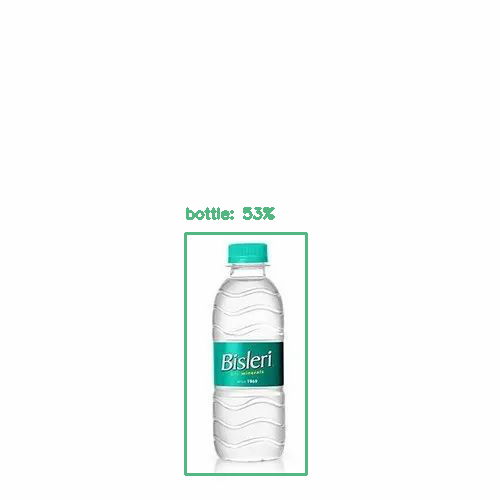

In [ ]:
#@title Run object detection and show the detection results

INPUT_IMAGE_URL = "" #@param {type:"string"}
DETECTION_THRESHOLD = 0.3 #@param {type:"number"}

TEMP_FILE = '/tmp/image.png'

!wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
im = Image.open(TEMP_FILE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(TEMP_FILE, 'PNG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)